<a href="https://colab.research.google.com/github/jordanbell2357/uscg-nais-data/blob/main/BigQuery/BigQuery_bquxjob_e7eb17c_1886a743940.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'ais-data-385301' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=ais-data-385301:US:bquxjob_e7eb17c_1886a743940)
back to BigQuery to edit the query within the BigQuery user interface.

In [2]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_e7eb17c_1886a743940') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT MMSI, COUNT(MMSI) AS MMSI_count FROM `ais-data-385301.uscg.nais` GROUP BY MMSI ORDER BY COUNT(MMSI);


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [3]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_e7eb17c_1886a743940') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,MMSI,MMSI_count
0,367697339,1
1,905088208,1
2,365626124,1
3,477832932,1
4,228028894,1
...,...,...
54199,366996610,71859
54200,366995670,71955
54201,367314530,72566
54202,368179250,73967


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [4]:
results.describe()

,MMSI_count
count,54204.0
mean,8927.454228
std,14559.435219
min,1.0
25%,374.0
50%,2295.0
75%,11006.0
max,74180.0


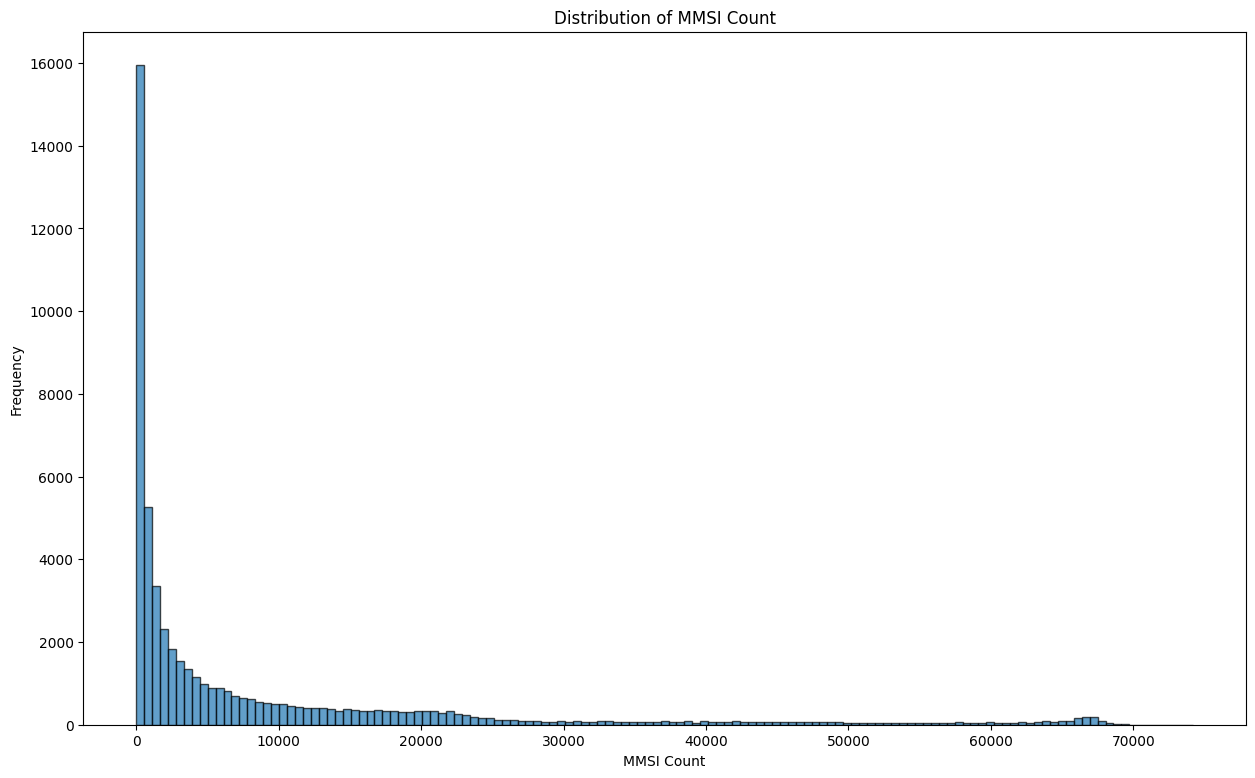

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Convert 'MMSI_count' to a 1-dimensional numpy array
mmsi_count = np.array(results['MMSI_count'])

# Create a larger figure
plt.figure(figsize=(15, 9))

# Create a histogram using matplotlib
plt.hist(mmsi_count, bins='auto', edgecolor='black', alpha=0.7)
plt.xlabel("MMSI Count")
plt.ylabel("Frequency")
plt.title("Distribution of MMSI Count")

plt.show()

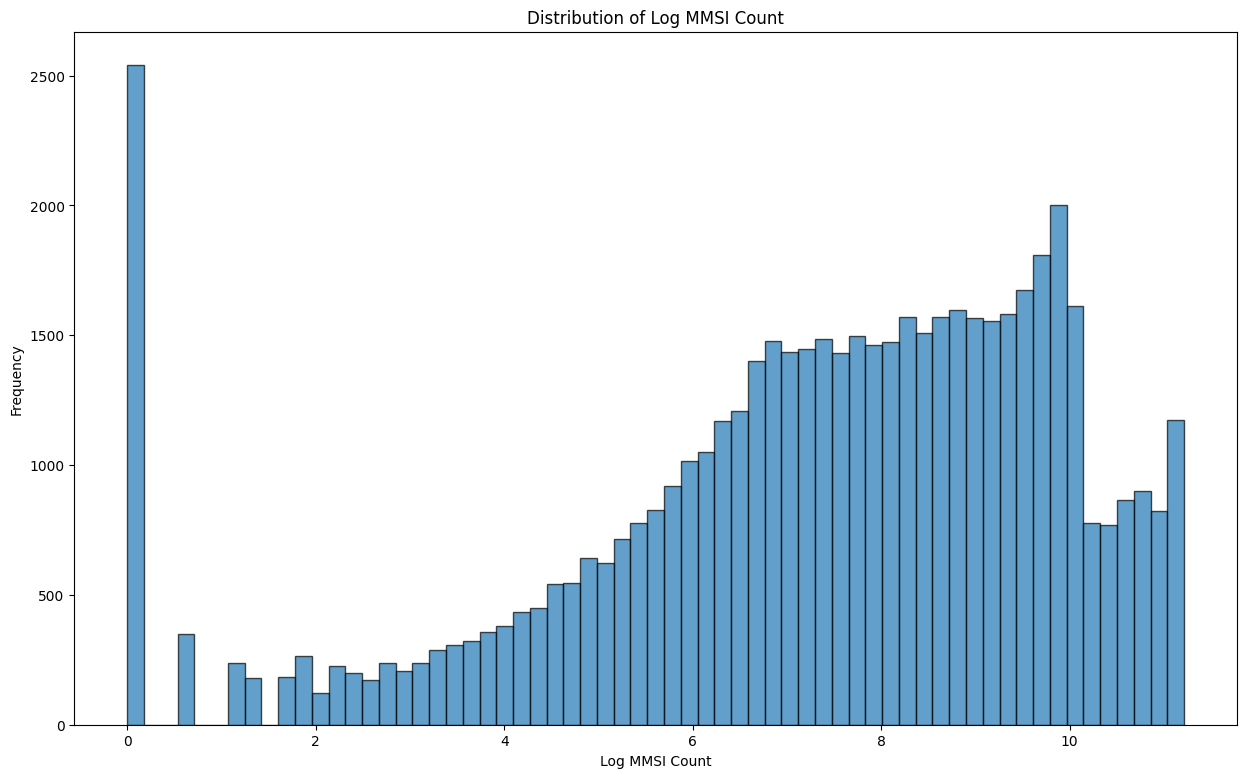

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Convert 'MMSI_count' to a 1-dimensional numpy array
mmsi_count = np.array(results['MMSI_count'], dtype=float)  # Convert to float

# Apply log transform
log_mmsi_count = np.log(mmsi_count)

# Create a larger figure
plt.figure(figsize=(15, 9))

# Create a histogram using matplotlib
plt.hist(log_mmsi_count, bins='auto', edgecolor='black', alpha=0.7)
plt.xlabel("Log MMSI Count")
plt.ylabel("Frequency")
plt.title("Distribution of Log MMSI Count")

plt.show()

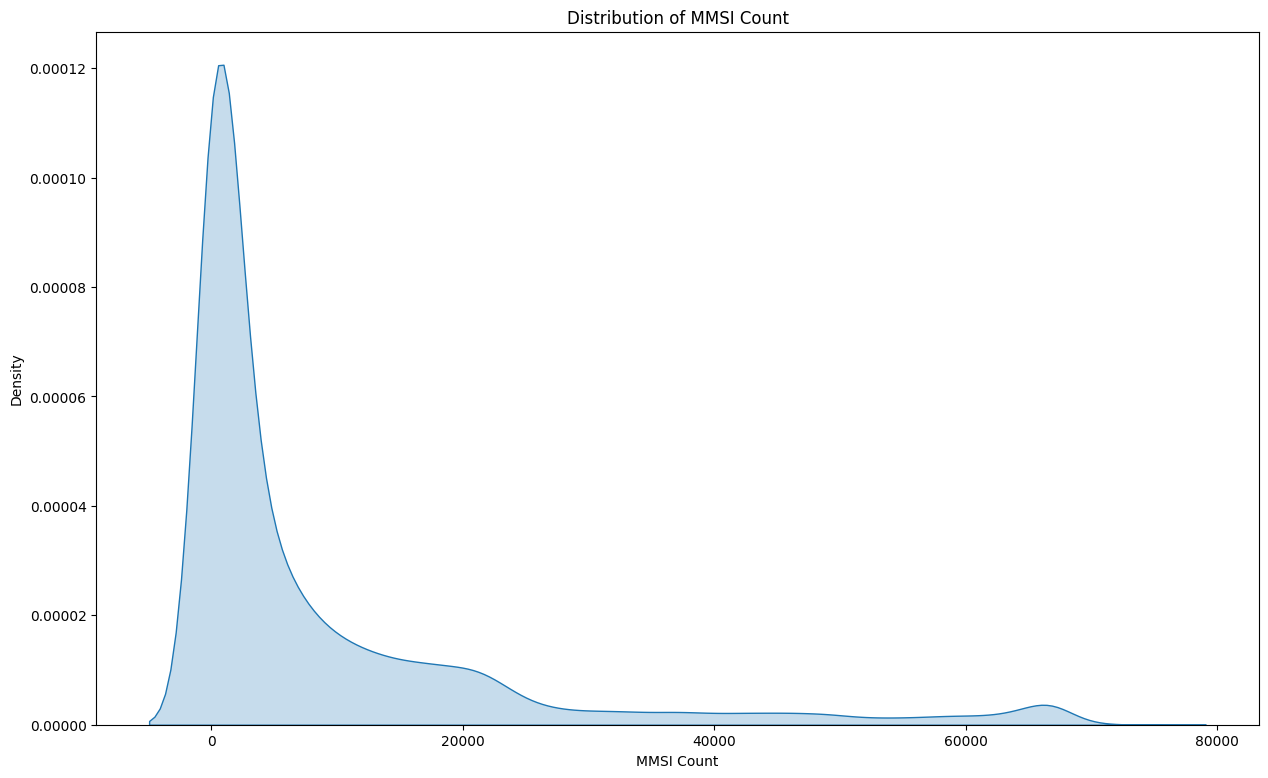

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'MMSI_count' to a 1-dimensional numpy array
mmsi_count = np.array(results['MMSI_count'])

# Create a larger figure
plt.figure(figsize=(15, 9))

# Create a KDE plot using seaborn
sns.kdeplot(mmsi_count, fill=True)
plt.xlabel("MMSI Count")
plt.ylabel("Density")
plt.title("Distribution of MMSI Count")
plt.show()

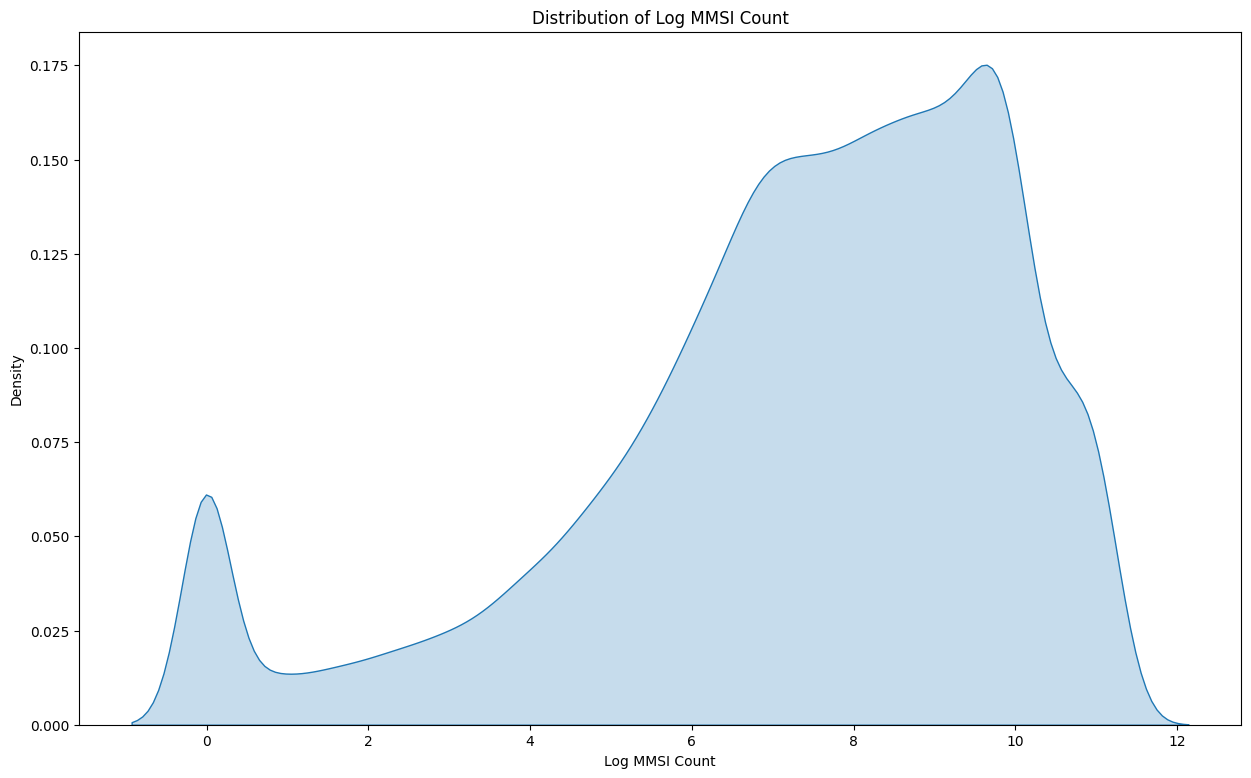

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'MMSI_count' to a 1-dimensional numpy array
mmsi_count = np.array(results['MMSI_count'], dtype=float)

# Apply log transform
log_mmsi_count = np.log(mmsi_count)

# Create a larger figure
plt.figure(figsize=(15, 9))

# Create a KDE plot using seaborn
sns.kdeplot(log_mmsi_count, fill=True)
plt.xlabel("Log MMSI Count")
plt.ylabel("Density")
plt.title("Distribution of Log MMSI Count")
plt.show()